# Data Preprocessing

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb 

import tensorflow as tf 
from tensorflow import keras 
from keras import layers 

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
df.shape

(398, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


# Exploratory Data Analysis

In [6]:
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [7]:
print(df.shape)
df = df[df['horsepower'] != '?']
print(df.shape)

(398, 9)
(392, 9)


In [8]:
df['horsepower'] = df['horsepower'].astype(int)
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [9]:
df.nunique()

mpg             127
cylinders         5
displacement     81
horsepower       93
weight          346
acceleration     95
model year       13
origin            3
car name        301
dtype: int64

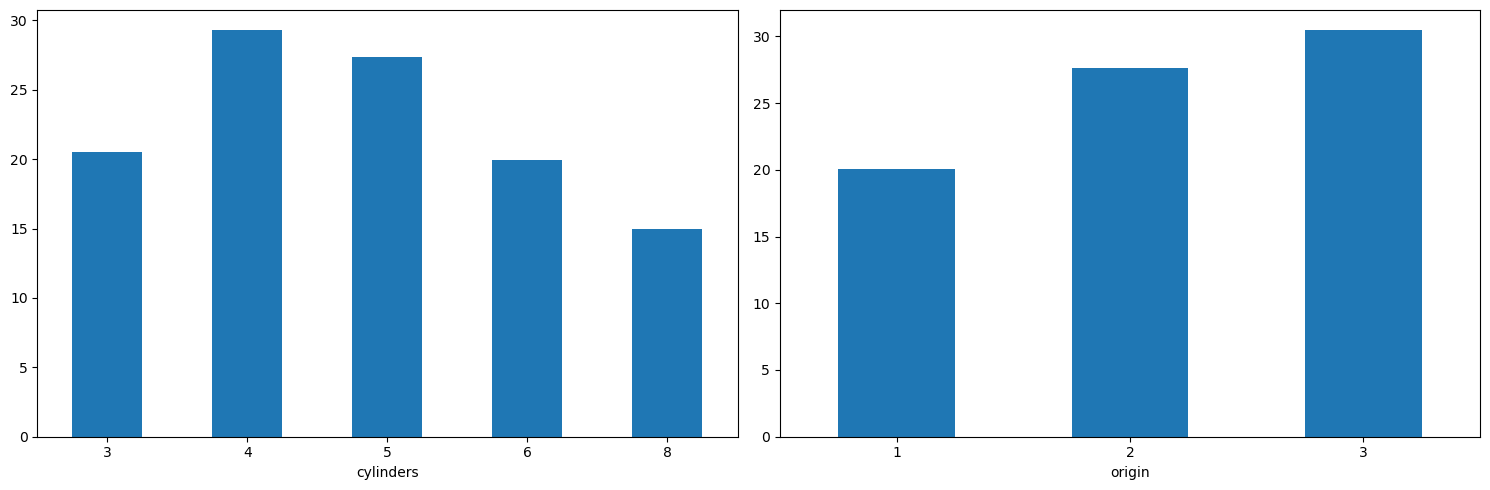

In [15]:
plt.subplots(figsize = (15, 5))
for i, col in enumerate(['cylinders', 'origin']):
    plt.subplot(1, 2, i+1)
    x = df.groupby(col).mean()['mpg']
    x.plot.bar()
    plt.xticks(rotation = 0)

plt.tight_layout()
plt.show()

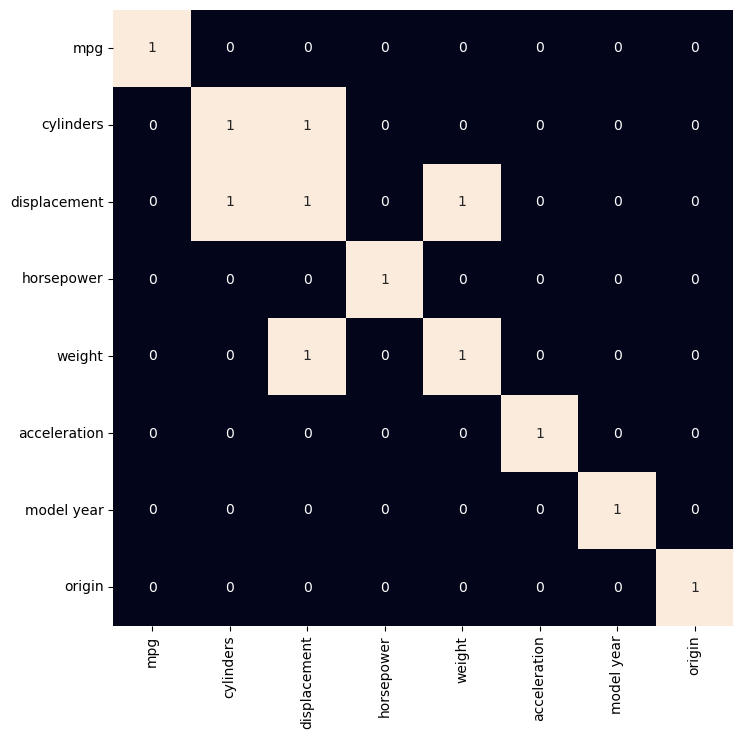

In [30]:
plt.figure(figsize = (8, 8))
sb.heatmap(df.corr() > 0.9, annot = True, cbar = False)
plt.show()

In [32]:
df.drop('displacement', axis=1, inplace=True) 

# Model Architecture

In [33]:
from sklearn.model_selection import train_test_split
features = df.drop(['mpg', 'car name'], axis = 1)
target = df['mpg'].values

X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size = 0.2, random_state = 22)
X_train.shape, X_val.shape

((313, 6), (79, 6))

In [34]:
AUTO = tf.data.experimental.AUTOTUNE

train_ds = ( 
    tf.data.Dataset 
    .from_tensor_slices((X_train, Y_train)) 
    .batch(32) 
    .prefetch(AUTO) 
) 

val_ds = ( 
    tf.data.Dataset 
    .from_tensor_slices((X_val, Y_val)) 
    .batch(32) 
    .prefetch(AUTO) 
) 

In [35]:
model = keras.Sequential([
    layers.Dense(256, activation = 'relu', input_shape = [6]),
    layers.BatchNormalization(),
    layers.Dense(256, activation = 'relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1, activation = 'relu')
])

In [36]:
model.compile(
    loss = 'mae',
    optimizer = 'adam',
    metrics = ['mape']
)

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               1792      
                                                                 
 batch_normalization_2 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 batch_normalization_3 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dense_5 (Dense)             (None, 1)                

# Model Training

In [38]:
history = model.fit(train_ds, epochs=50, validation_data=val_ds) 

Epoch 1/50


10/10 [==============================] - 2s 25ms/step - loss: 21.2931 - mape: 84.5730 - val_loss: 33.5749 - val_mape: 205.3654
Epoch 2/50
10/10 [==============================] - 0s 7ms/step - loss: 19.9398 - mape: 76.8658 - val_loss: 19.1752 - val_mape: 114.9821
Epoch 3/50
10/10 [==============================] - 0s 7ms/step - loss: 19.1802 - mape: 73.2410 - val_loss: 14.3486 - val_mape: 78.8161
Epoch 4/50
10/10 [==============================] - 0s 6ms/step - loss: 18.6219 - mape: 70.6698 - val_loss: 11.6829 - val_mape: 56.2766
Epoch 5/50
10/10 [==============================] - 0s 7ms/step - loss: 18.1941 - mape: 68.6662 - val_loss: 11.8650 - val_mape: 59.1259
Epoch 6/50
10/10 [==============================] - 0s 6ms/step - loss: 17.7198 - mape: 66.3711 - val_loss: 11.5998 - val_mape: 58.4043
Epoch 7/50
10/10 [==============================] - 0s 6ms/step - loss: 17.2104 - mape: 63.8588 - val_loss: 10.5373 - val_mape: 50.7495
Epoch 8/50
10/10 [=========================

In [39]:
history_df = pd.DataFrame(history.history)
history_df.head()

,loss,mape,val_loss,val_mape
0,21.293139,84.572952,33.574856,205.365387
1,19.939785,76.865784,19.175222,114.982101
2,19.180159,73.240967,14.348642,78.816124
3,18.621851,70.669792,11.682907,56.276566
4,18.194082,68.666161,11.864964,59.125858


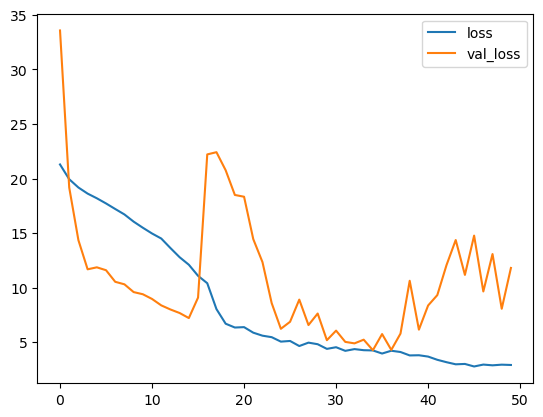

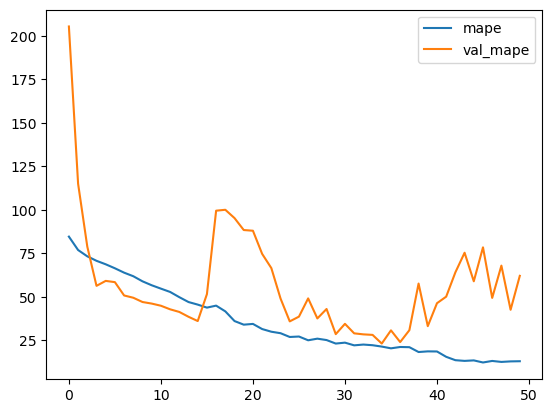

In [40]:
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['mape', 'val_mape']].plot()
plt.show()